# Library importation

In [1]:
# Libraries Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
# Load the dataset
df = pd.read_excel('/workspaces/intermediate_project/DATA_WRANGLING/ridwan_wrangling_task/Online Retail.xlsx')
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
338235,566520,21155,RED RETROSPOT PEG BAG,2,2011-09-13 11:26:00,2.55,17757.0,United Kingdom
46298,540352,84685,BEACH HUT KEY CABINET,1,2011-01-06 14:27:00,7.62,NaN,United Kingdom
51051,540639,22615,PACK OF 12 CIRCUS PARADE TISSUES,24,2011-01-10 12:28:00,0.29,13107.0,United Kingdom
512268,579512,22075,6 RIBBONS ELEGANT CHRISTMAS,3,2011-11-29 16:47:00,1.63,NaN,United Kingdom
216917,555857,23206,LUNCH BAG APPLE DESIGN,3,2011-06-07 14:03:00,1.65,16393.0,United Kingdom
358480,568150,21287,SCENTED VELVET LOUNGE CANDLE,48,2011-09-25 11:39:00,0.38,16689.0,United Kingdom
298485,563022,21749,LARGE RED RETROSPOT WINDMILL,1,2011-08-11 13:34:00,2.10,17248.0,United Kingdom
185251,552802,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",1,2011-05-11 12:23:00,4.95,16115.0,United Kingdom
249524,558904,84596L,BISCUITS SMALL BOWL LIGHT BLUE,1,2011-07-04 16:18:00,0.83,NaN,United Kingdom
106823,545345,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2011-03-02 09:33:00,165.00,14180.0,United Kingdom


# Data Inspection

In [3]:
# data information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# data shape
df.shape 

(541909, 8)

The dataset contains 8 variables and 541909 observations.

In [5]:
# summary data description
df.describe() 

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# missing values sum
df.isnull().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The null values in the dataset are in the CustomerID and Description columns. The number of missing values in the CustomerID column is 135080 and the number of missing values in the Description column is 1454.

In [7]:
#check for duplicates
df.duplicated().sum()

5268

The total sum of the duplicate rows are 5268

In [8]:
# unique values in each column
for i in df.columns:
    print(i, df[i].nunique())

InvoiceNo 25900
StockCode 4070
Description 4223
Quantity 722
InvoiceDate 23260
UnitPrice 1630
CustomerID 4372
Country 38


In [9]:
# check for zero values
for i in df.columns:
    print(i, (df[i]==0).sum())

InvoiceNo 0
StockCode 0
Description 0
Quantity 0
InvoiceDate 0
UnitPrice 2515
CustomerID 0
Country 0


There are zero values in only one column 'UnitPrice' which is 2515

## Handling Missing values

In [10]:
df.isnull().sum() #missing values sum

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The null values in the dataset are in the CustomerID and Description columns. The number of missing values in the CustomerID column is 135080 and the number of missing values in the Description column is 1454.

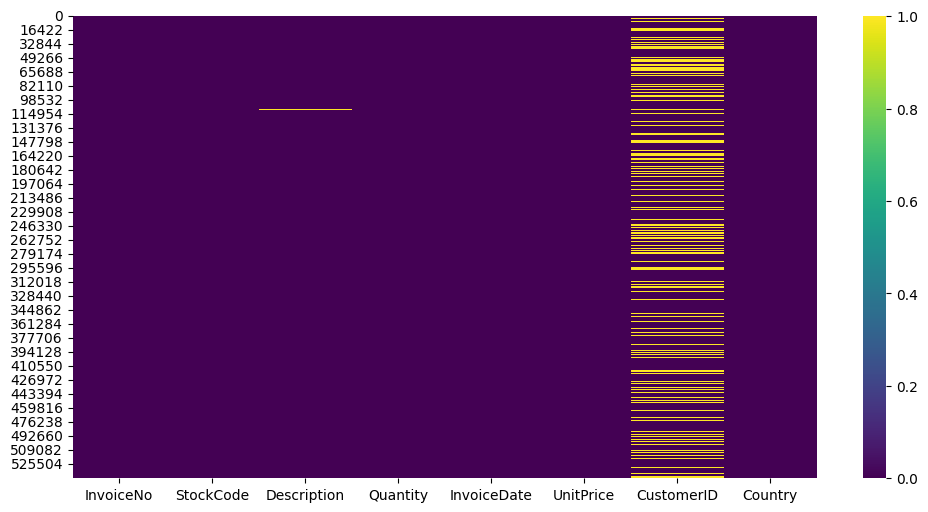

In [11]:
# check for destribution of the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [12]:
# handle description missing values base on the same 
df['Description'].fillna('No Description', inplace=True)

# handle missing values in CustomerID
df['CustomerID'].fillna(-1, inplace=True)

# check for missing values
df.isnull().sum()

/tmp/ipykernel_14982/534268381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('No Description', inplace=True)
/tmp/ipykernel_14982/534268381.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

The missing values in 'Description' were replaced with 'No Description' to maintain the context while the missing values in 'CustomerID' were set to `-1` to indicate missing customer identifiers without losing data rows.

## Handling duplicated values

In [13]:
# check for duplicates in each column
for column in df.columns:
    duplicates = df[column].duplicated().sum()
    print(f"Duplicates in column '{column}': {duplicates}")

Duplicates in column 'InvoiceNo': 516009
Duplicates in column 'StockCode': 537839
Duplicates in column 'Description': 537685
Duplicates in column 'Quantity': 541187
Duplicates in column 'InvoiceDate': 518649
Duplicates in column 'UnitPrice': 540279
Duplicates in column 'CustomerID': 537536
Duplicates in column 'Country': 541871


In [14]:
# check for exact duplicates across all columns
df.duplicated().sum()

5268

In [15]:
# Remove exact duplicates
df.drop_duplicates(inplace=True)

# check for duplicate
df.duplicated().sum()

0

The duplicates in the dataset were removed. Duplicates data can distort what we want to use the data for and were removed to ensure data integrity. 

## Inconsistent Formatting

In [16]:
# list the unique values in 'Decription' column
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [17]:
# fix the formatting inconsistencies in 'Decription' column
df['Description'] = df['Description'].str.strip().str.lower().str.title()
df['Description'].unique()

array(['White Hanging Heart T-Light Holder', 'White Metal Lantern',
       'Cream Cupid Hearts Coat Hanger', ..., 'Lost',
       'Cream Hanging Heart T-Light Holder',
       'Paper Craft , Little Birdie'], dtype=object)

In [18]:
# list the unique values in 'Country' column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [19]:
# Replace some block names in the 'Country' column
df['Country'] = df['Country'].replace({
    'RSA': 'South Africa',
    'USA': 'United States of America',
    'EIRE': 'Ireland'})

df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil',
       'United States of America', 'European Community', 'Malta',
       'South Africa'], dtype=object)

The text data in 'Description' and 'Country' columns were normalize to ensure consistency in text data by fixing the formatting inconsistencies in 'Decription' column and Standardizing the 'Country' column by replacing specific country codes with their full names.

In [20]:
# list the data columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [21]:
# list the unique values in 'Quantity' column
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [22]:
# distributions of characters in the InvoiceNo column
df['InvoiceNo'].apply(lambda x: len(str(x))).value_counts()

InvoiceNo
6    527387
7      9254
Name: count, dtype: int64

The results shows that the column has values with 6 characters while the one with 7th characters has letter 'C' which indicates that the transaction was canceled.
> **Base on the reference information:** InvoiceNo is a a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

In [23]:
# distributions of characters in the 'StockCode' 
df['StockCode'].apply(lambda x: len(str(x))).value_counts()

StockCode
5     482154
6      51108
4       1276
3        710
1        709
7        390
2        144
12        71
9         48
8         31
Name: count, dtype: int64

The results shows that the 'StockCode' columns has 5,6,4,3,1,7,2,12,9, and 8 characters long.

In [24]:
# samples of the 'StockCode' column with each characters count
for i in range(1, 12):
    print(f"StockCode with {i} characters:")
    print(df[df['StockCode'].apply(lambda x: len(str(x))) == i]['StockCode'].unique()[:5])
    print()

StockCode with 1 characters:
['D' 'M' 'S' 'm' 'B']

StockCode with 2 characters:
['C2']

StockCode with 3 characters:
['DOT']

StockCode with 4 characters:
['POST' 'PADS' 'CRUK']

StockCode with 5 characters:


[71053 22752 21730 22633 22632]

StockCode with 6 characters:
['85123A' '84406B' '84029G' '84029E' '82494L']

StockCode with 7 characters:
['15056BL' '15056bl' '79323GR' '79323LP']

StockCode with 8 characters:
['DCGS0076' 'DCGS0003' 'DCGS0070' 'DCGS0055' 'DCGS0072']

StockCode with 9 characters:
['AMAZONFEE' 'DCGSSGIRL' 'DCGS0066P']

StockCode with 10 characters:
[]

StockCode with 11 characters:
[]



In [25]:
# distributions of characters in the 'CustomerID' column
df['CustomerID'].apply(lambda x: len(str(x))).value_counts()

CustomerID
7    401604
4    135037
Name: count, dtype: int64

In [26]:
print(f"CustomerID with {7} characters:")
print(df[df['CustomerID'].apply(lambda x: len(str(x))) == 7]['CustomerID'].unique()[:5])

print()

print(f"CustomerID with {4} characters:")
print(df[df['CustomerID'].apply(lambda x: len(str(x))) == 4]['CustomerID'].unique()[:5])
 

CustomerID with 7 characters:


[17850. 13047. 12583. 13748. 15100.]

CustomerID with 4 characters:
[-1.]


The -1 in the 'CustomerID' column is a placeholder for missing values

## Incorrect Data Types

In [27]:
# check for data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [28]:
# convert 'customerID' datatypes
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'].dtype


dtype('int64')

The 'customerID' column was converted to integer data type because it is integral customer identifier.

## Outliers

In [29]:
# using IQR (Interquartile Range) method

# check for outliers in the 'Unit price column' 
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice
lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

unitprice_outliers = df[(df['UnitPrice'] < lower_bound_unitprice) | (df['UnitPrice'] > upper_bound_unitprice)]
unitprice_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,Box Of Vintage Alphabet Blocks,2,2010-12-01 08:34:00,9.95,13047,United Kingdom
45,536370,POST,Postage,3,2010-12-01 08:45:00,18.00,12583,France
65,536374,21258,Victorian Sewing Box Large,32,2010-12-01 09:09:00,10.95,15100,United Kingdom
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
151,536382,22839,3 Tier Cake Tin Green And Cream,2,2010-12-01 09:45:00,14.95,16098,United Kingdom
...,...,...,...,...,...,...,...,...
541768,581578,POST,Postage,3,2011-12-09 12:16:00,18.00,12713,Germany
541786,581578,22622,Box Of Vintage Alphabet Blocks,6,2011-12-09 12:16:00,11.95,12713,Germany
541831,581579,22941,Christmas Lights 10 Reindeer,4,2011-12-09 12:19:00,8.50,17581,United Kingdom
541849,581580,22894,Tablecloth Red Apples Design,2,2011-12-09 12:20:00,9.95,12748,United Kingdom


In [30]:
# check for outliers in the 'Quantity column' 
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

quantity_outliers = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]
quantity_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,Assorted Colour Bird Ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom
26,536370,22728,Alarm Clock Bakelike Pink,24,2010-12-01 08:45:00,3.75,12583,France
27,536370,22727,Alarm Clock Bakelike Red,24,2010-12-01 08:45:00,3.75,12583,France
30,536370,21883,Stars Gift Tape,24,2010-12-01 08:45:00,0.65,12583,France
31,536370,10002,Inflatable Political Globe,48,2010-12-01 08:45:00,0.85,12583,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,Multi Colour Silver T-Light Holder,24,2011-12-09 12:31:00,0.85,15804,United Kingdom
541882,581585,21916,Set 12 Retro White Chalk Sticks,24,2011-12-09 12:31:00,0.42,15804,United Kingdom
541883,581585,84692,Box Of 24 Cocktail Parasols,25,2011-12-09 12:31:00,0.42,15804,United Kingdom
541891,581586,23275,Set Of 3 Hanging Owls Ollie Beak,24,2011-12-09 12:49:00,1.25,13113,United Kingdom


Interquartile Range method (IQR method) techniques is used to detect outliers in the 'Quantity' and 'UnitPrice' columns. However, there is lots of outliers in both columns. So boxplot is used to detect outliers in the 'Quantity' and 'UnitPrice' columns.

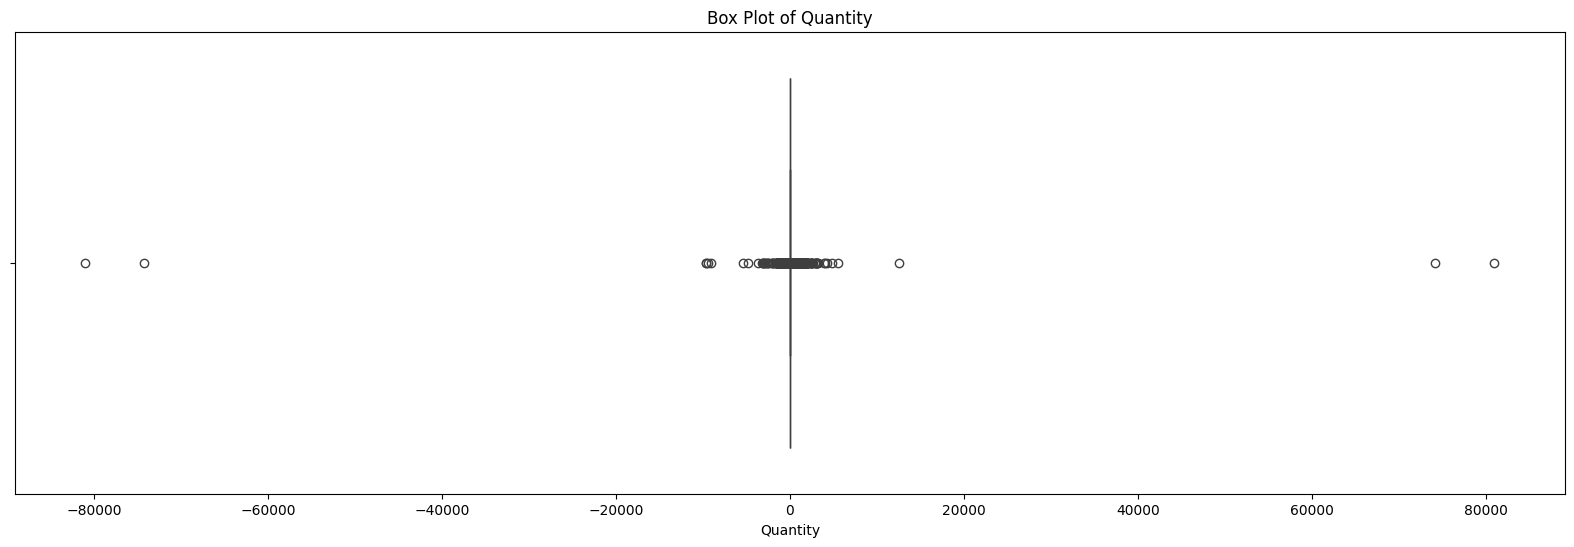

In [31]:
plt.figure(figsize=(20, 6))

# for Quantity column
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')

plt.show()


In [32]:
# Base on the plot (setting manual threshold)
lower_bound_quantity = -6000
upper_bound_quantity = 6000

# Identify and filter outliers
outliers_quantity = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]

print(f"Number of outliers in Quantity column: {outliers_quantity.shape[0]}")
outliers_quantity

Number of outliers in Quantity column: 9


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,Rotating Silver Angels T-Light Hldr,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
61619,541431,23166,Medium Ceramic Top Storage Jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,Medium Ceramic Top Storage Jar,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
225528,556687,23003,Printing Smudges/Thrown Away,-9058,2011-06-14 10:36:00,0.00,-1,United Kingdom
225529,556690,23005,Printing Smudges/Thrown Away,-9600,2011-06-14 10:37:00,0.00,-1,United Kingdom
225530,556691,23005,Printing Smudges/Thrown Away,-9600,2011-06-14 10:37:00,0.00,-1,United Kingdom
502122,578841,84826,Asstd Design 3D Paper Stickers,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
540421,581483,23843,"Paper Craft , Little Birdie",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
540422,C581484,23843,"Paper Craft , Little Birdie",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [33]:
# Remove outliers 
df_cleaned = df[(df['Quantity'] >= lower_bound_quantity) & (df['Quantity'] <= upper_bound_quantity)]

print(f"Minimum Quantity: {df_cleaned['Quantity'].min()}")
print(f"Maximum Quantity: {df_cleaned['Quantity'].max()}")

Minimum Quantity: -5368
Maximum Quantity: 5568


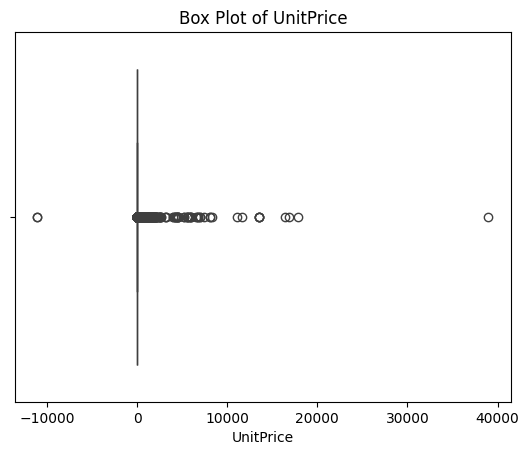

In [34]:
# for UnitPrice column
sns.boxplot(x=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.show()

In [35]:
# Base on the plot (setting manual threshold)
lower_bound_unitprice = 0
upper_bound_unitprice = 9000

# Identify and filter outliers
outliers_unitprice = df[(df['UnitPrice'] < lower_bound_unitprice) | (df['UnitPrice'] > upper_bound_unitprice)]

print(f"Number of outliers in UnitPrice column: {outliers_unitprice.shape[0]}")
outliers_unitprice


Number of outliers in UnitPrice column: 12


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,Amazon Fee,-1,2010-12-07 15:04:00,13541.33,-1,United Kingdom
15017,537632,AMAZONFEE,Amazon Fee,1,2010-12-07 15:08:00,13541.33,-1,United Kingdom
16232,C537644,AMAZONFEE,Amazon Fee,-1,2010-12-07 15:34:00,13474.79,-1,United Kingdom
16356,C537651,AMAZONFEE,Amazon Fee,-1,2010-12-07 15:49:00,13541.33,-1,United Kingdom
43702,C540117,AMAZONFEE,Amazon Fee,-1,2011-01-05 09:55:00,16888.02,-1,United Kingdom
43703,C540118,AMAZONFEE,Amazon Fee,-1,2011-01-05 09:57:00,16453.71,-1,United Kingdom
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom
299982,A563185,B,Adjust Bad Debt,1,2011-08-12 14:50:00,11062.06,-1,United Kingdom
299983,A563186,B,Adjust Bad Debt,1,2011-08-12 14:51:00,-11062.06,-1,United Kingdom
299984,A563187,B,Adjust Bad Debt,1,2011-08-12 14:52:00,-11062.06,-1,United Kingdom


In [36]:
# Remove outliers
df_cleaned = df_cleaned[(df_cleaned['UnitPrice'] >= lower_bound_unitprice) & (df_cleaned['UnitPrice'] <= upper_bound_unitprice)]

print(f"Minimum UnitPrice: {df_cleaned['UnitPrice'].min()}")
print(f"Maximum UnitPrice: {df_cleaned['UnitPrice'].max()}")

Minimum UnitPrice: 0.0
Maximum UnitPrice: 8286.22


In [37]:
df.shape, df_cleaned.shape

((536641, 8), (536620, 8))

## Data Validation

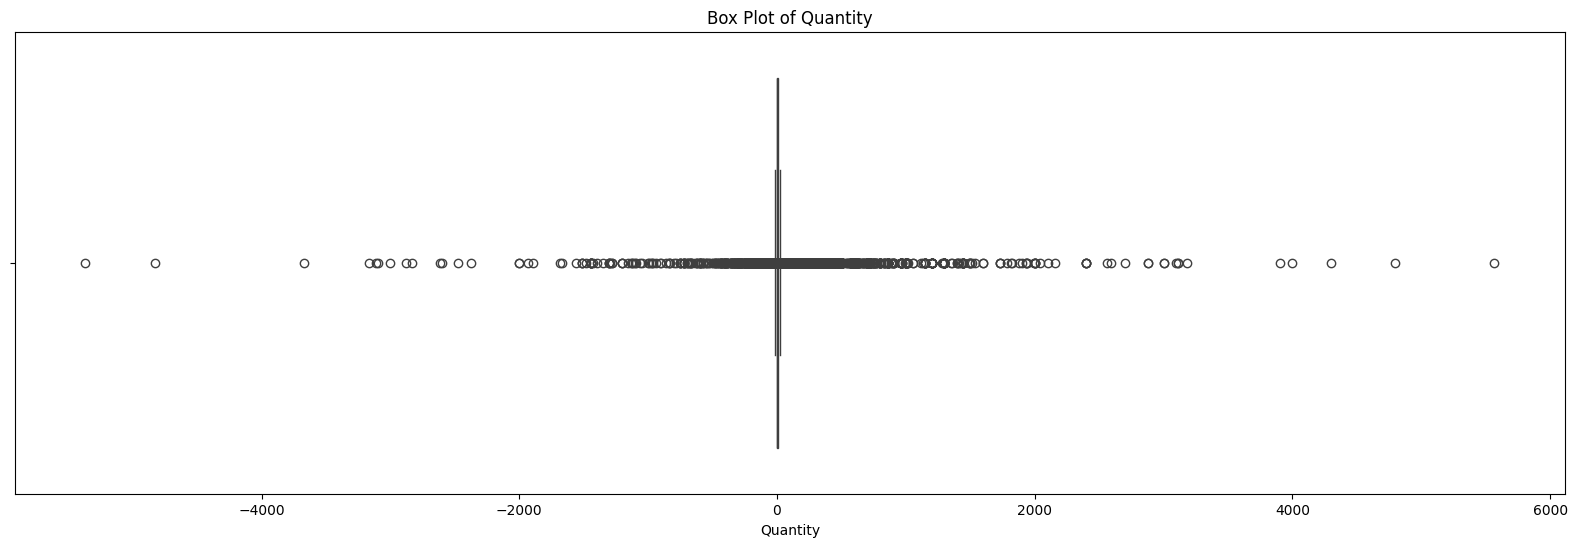

In [38]:
plt.figure(figsize=(20, 6))

# for Quantity column
sns.boxplot(x=df_cleaned['Quantity'])
plt.title('Box Plot of Quantity')

plt.show()


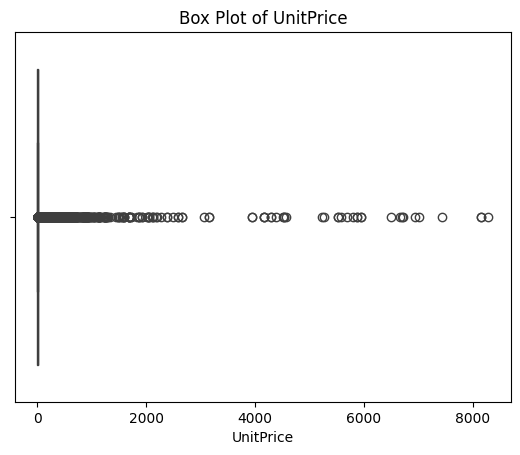

In [39]:
# for UnitPrice column
sns.boxplot(x=df_cleaned['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.show()

In [40]:
# checking for 'Quantity' range
quantity_range = (-6000, 6000)

# print invalid range
df_cleaned[~df_cleaned['Quantity'].between(quantity_range[0], quantity_range[1])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [41]:
# checking for 'Quantity' range
unitprice_range = (0, 9000)

# print invalid range   
df_cleaned[~df_cleaned['UnitPrice'].between(unitprice_range[0], unitprice_range[1])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [42]:
# check for missing values
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [43]:
df.shape, df_cleaned.shape

((536641, 8), (536620, 8))

In [44]:
# check data types
df_cleaned.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

The cleaned data were validated that the cleaned data adheres to expected ranges and contains no unexpected or reintroduced issues by ensuring it meets the specified requirements before saving or used.

## Create new features

In [45]:
# create a new column 'Cancelled_InvoiceNo' to indicate if an invoice was cancelled
df_cleaned['Cancelled_InvoiceNo'] = df_cleaned['InvoiceNo'].astype(str).apply(lambda x: 'Yes' if 'C' in x else 'No')
df_cleaned['Cancelled_InvoiceNo'].value_counts()

Cancelled_InvoiceNo
No     527380
Yes      9240
Name: count, dtype: int64

<Axes: xlabel='Cancelled_InvoiceNo'>

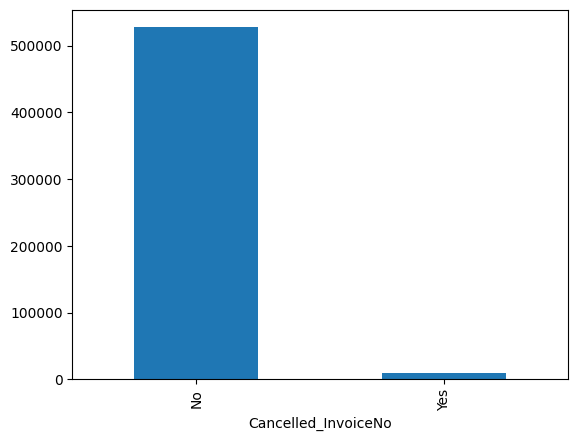

In [46]:
# the distribution of the 'Cancelled_InvoiceNo' column
df_cleaned['Cancelled_InvoiceNo'].value_counts().plot(kind='bar')

In [47]:
# create a new column 'TotalPrice' to calculate the total price of each item
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['TotalPrice'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalPrice, dtype: float64

In [48]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled_InvoiceNo,TotalPrice
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,No,15.30
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,No,20.34
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,No,22.00
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,No,20.34
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,No,20.34


In [50]:
# save the cleaned data to a new csv file
df_cleaned.to_csv('online_retail_cleaned.csv', index=False)